<a href="https://colab.research.google.com/github/rabinpandey123/Dog_vs_cat_classification/blob/main/dog_vs_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [18]:
!chmod 600 /content/kaggle (1).json

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `chmod 600 /content/kaggle (1).json'


In [21]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 56% 121M/218M [00:00<00:00, 1.26GB/s]
100% 218M/218M [00:00<00:00, 836MB/s] 


In [24]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [27]:
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/training_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test_set',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 8005 files belonging to 1 classes.
Found 2023 files belonging to 1 classes.


In [28]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [29]:
#create CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 97ms/step - accuracy: 0.9758 - loss: 0.0198 - val_accuracy: 1.0000 - val_loss: 2.4680e-37
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 83ms/step - accuracy: 1.0000 - loss: 3.8620e-32 - val_accuracy: 1.0000 - val_loss: 2.4680e-37
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 18s 73ms/step - accuracy: 1.0000 - loss: 3.3541e-32 - val_accuracy: 1.0000 - val_loss: 2.4680e-37
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step - accuracy: 1.0000 - loss: 3.0715e-32 - val_accuracy: 1.0000 - val_loss: 2.4680e-37
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - accuracy: 1.0000 - loss: 3.7883e-32 - val_accuracy: 1.0000 - val_loss: 2.4680e-37
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 1.0000 - loss: 3.8617e-32 - val_accuracy: 1.0000 - val_loss: 2.4680e-37
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 1.0000 - loss: 3.6405e-32 - val_accuracy: 1.0000 - val_loss: 2.4680e-37
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━

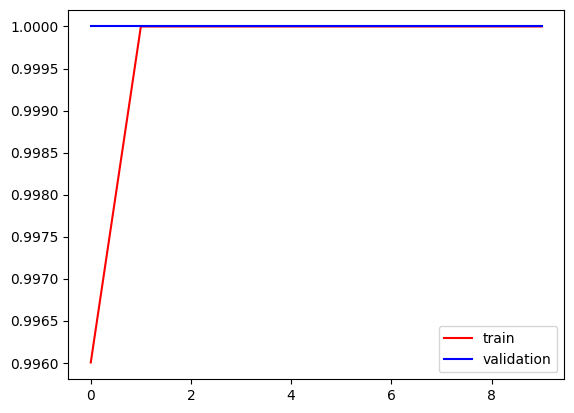

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [34]:
import cv2

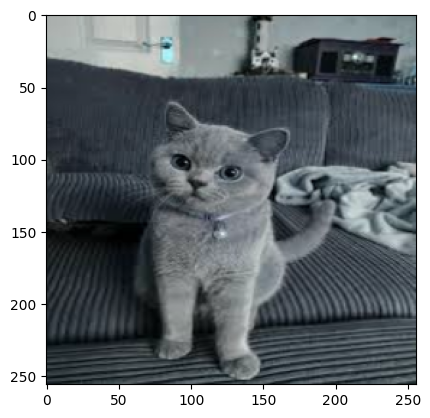

In [37]:
test_img = cv2.imread('/content/cat1.jpg')
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
plt.imshow(test_img)
plt.show()

In [38]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step


array([[0.]], dtype=float32)

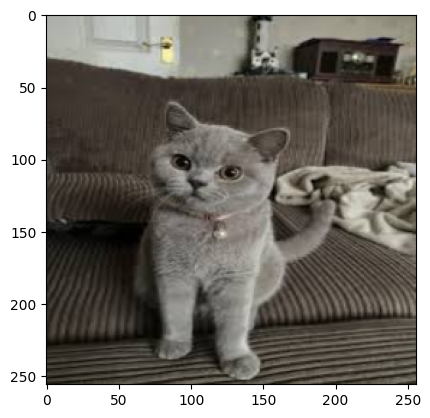

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
Cat 🐱 (prob: 0.0 )


In [39]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image
test_img = cv2.imread('/content/cat1.jpg')

# Convert BGR to RGB
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Resize same as training size
test_img = cv2.resize(test_img, (256, 256))

# Normalize (important!)
test_img = test_img / 255.0

# Add batch dimension
test_input = np.expand_dims(test_img, axis=0)

# Show image
plt.imshow(test_img)
plt.show()

# Predict
prediction = model.predict(test_input)

if prediction[0][0] > 0.5:
    print("Dog 🐶 (prob:", prediction[0][0], ")")
else:
    print("Cat 🐱 (prob:", prediction[0][0], ")")


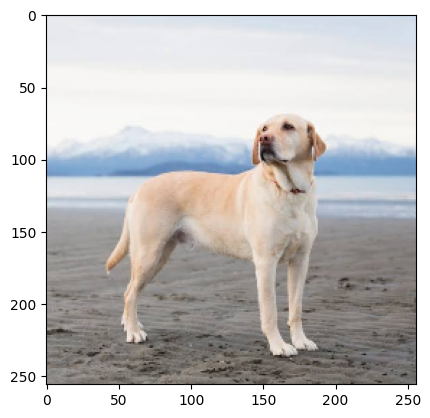

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Cat 🐱 (prob: 0.0 )


In [41]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image
test_img = cv2.imread('/content/dog.jpg')

# Convert BGR to RGB
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Resize same as training size
test_img = cv2.resize(test_img, (256, 256))

# Normalize (important!)
test_img = test_img / 255.0

# Add batch dimension
test_input = np.expand_dims(test_img, axis=0)

# Show image
plt.imshow(test_img)
plt.show()

# Predict
prediction = model.predict(test_input)

if prediction[0][0] > 0.5:
    print("Dog 🐶 (prob:", prediction[0][0], ")")
else:
    print("Cat 🐱 (prob:", prediction[0][0], ")")


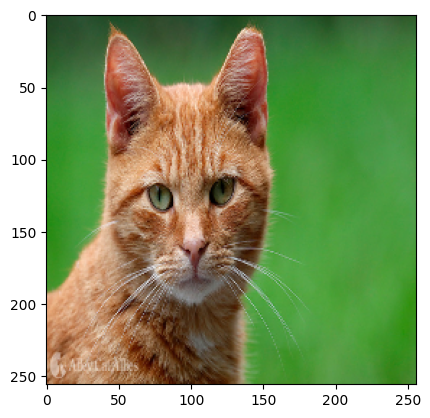

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Cat 🐱 (prob: 0.0 )


In [42]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load image
test_img = cv2.imread('/content/cat2.jpg')

# Convert BGR to RGB
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

# Resize same as training size
test_img = cv2.resize(test_img, (256, 256))

# Normalize (important!)
test_img = test_img / 255.0

# Add batch dimension
test_input = np.expand_dims(test_img, axis=0)

# Show image
plt.imshow(test_img)
plt.show()

# Predict
prediction = model.predict(test_input)

if prediction[0][0] > 0.5:
    print("Dog 🐶 (prob:", prediction[0][0], ")")
else:
    print("Cat 🐱 (prob:", prediction[0][0], ")")
